# <font face='menlo' size=10pt> Tests for Normality</font>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import seaborn as sns
import numpy as np
# import normal distribution
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

In [4]:
CDF = norm.cdf

In [8]:
n=50
x = norm.rvs(size=n,loc=0, scale = 1, random_state=123)

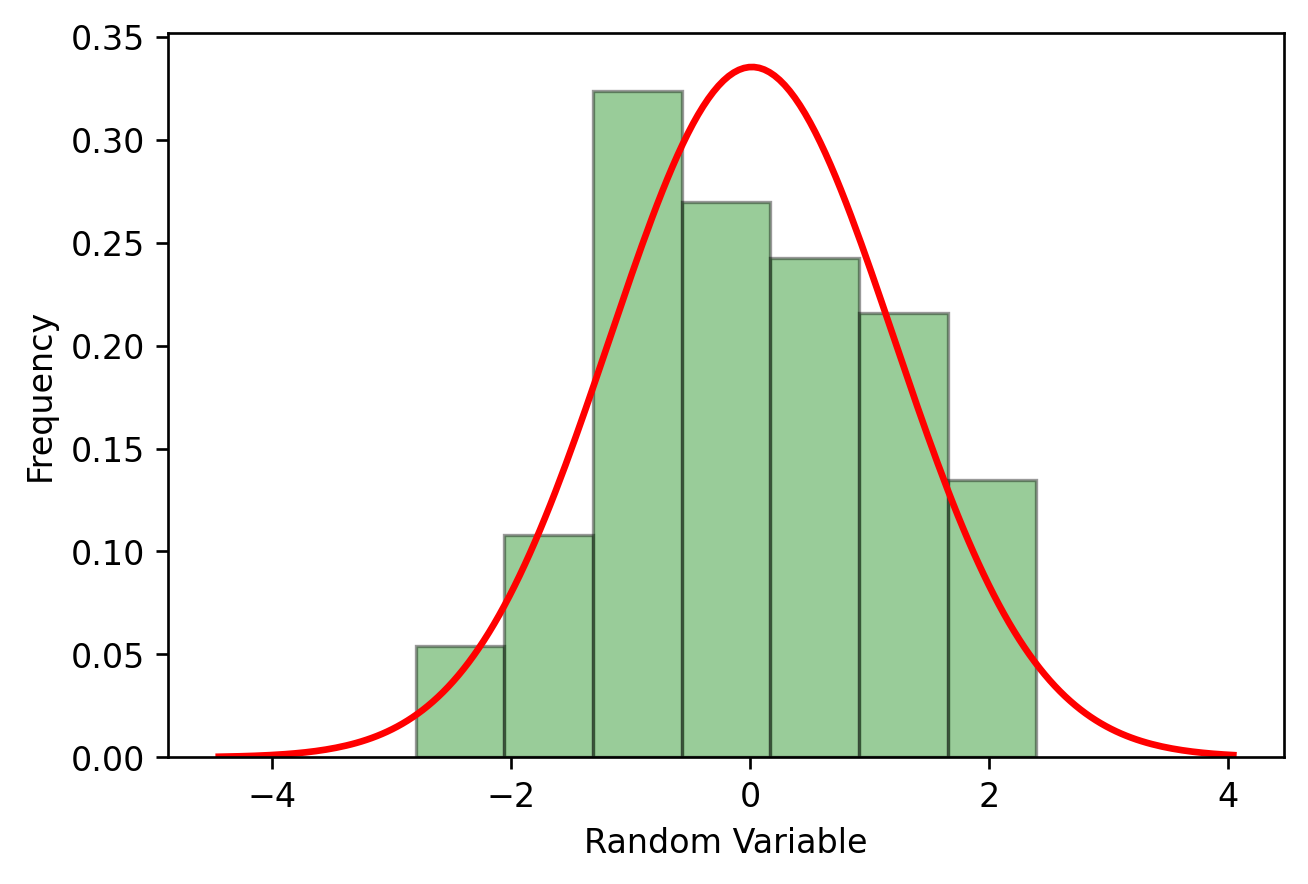

In [11]:
ax1 = sns.distplot(x,                                        
                  bins=7,
                  kde=False,
                  hist_kws={"color":'green','ec':'black'},
                  fit=stats.norm,
                  fit_kws={"color":'red','lw':2})
ax1.set(xlabel='Random Variable', ylabel='Frequency')
plt.show()

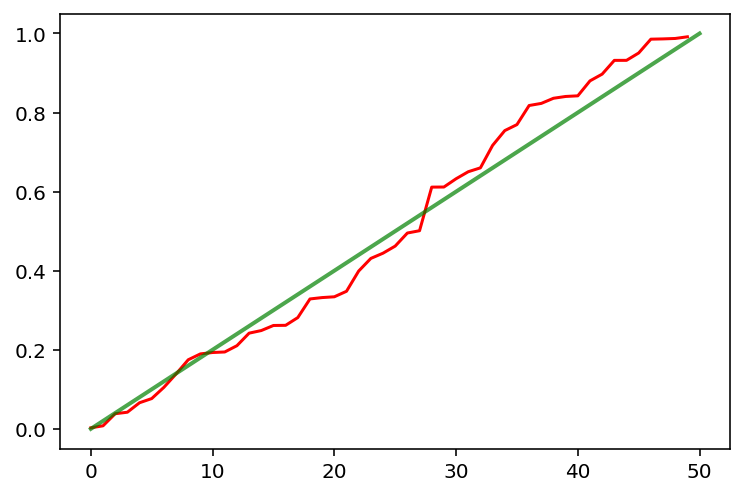

In [20]:
X_sorted = np.sort(x)
plt.plot(CDF(X_sorted),color='red')
plt.plot([0,50],[0,1],color='green',lw=2,alpha=0.7)
plt.show()

##<font face='menlo' size=6pt> The Kolmogorov-Smirnov Test:

The test is defined as:

  **H0 (the null hypothesis):**	The data follow a specified distribution.

  **H1 (the alternative hypothesis):** The data do not follow the specified distribution

The main idea is that we focus on how much the empirical cummulative distribution function is different from the theoretical cummulative distribution function, and we may consider:

$$\large \sup_{x} |ECDF(x) - CDF(x)|$$

where $ECDF(x)$ means the emprirical cummulative distribution function:

$$\large ECDF(x):= \frac{1}{n}\sum \mathbb{1}(t)_{t<x}$$

and, $CDF$ stands for the cummulative distribution function:

$$\large CDF(x):= \int_{-\infty}^{x}f(t)dt.$$  Here $f$ is the probability density function.

If we order the observations, such as $x_i\leq x_j$ when $i\leq j$, then the test statistic is formally defined by:

$$\large D:=\max_{1\leq i\leq n}\left\{CDF(x_i)-\frac{i-1}{n},\frac{i}{n}-CDF(x_i)\right\}$$

The mathematical notation means that we add $1$ for each $t$ less than $x$ and $n$ represents the sample size.



In [13]:
def test_ks(x):
  n = len(x)
  x_sorted = np.sort(x)
  d = 0.0
  for i in range(n):
    if d < np.max([CDF(x_sorted[i])-i/n,(i+1)/n-CDF(x_sorted[i])]):
      d = np.max([CDF(x_sorted[i])-i/n,(i+1)/n-CDF(x_sorted[i])])
    #look for the largest value^
  return d
#gives you the test statistic

In [14]:
test_ks(x)

0.09782441463816816

In [62]:
stats.kstest(x,'norm')

KstestResult(statistic=0.09782441463816816, pvalue=0.721200683850531)

In [15]:
from scipy.stats import ksone

def ks_critical_value(n_trials, alpha):
    return ksone.ppf(1-alpha/2, n_trials)

trials = range(1, 101)
alphas = [0.1, 0.05, 0.02, 0.01]

# Print table headers
print('{:<6}|{:<6} Level of significance, alpha'.format(' ', ' '))
print('{:<6}|{:>8} {:>8} {:>8} {:>8}'.format(*['Trials'] + alphas))
print('-' * 42)
# Print critical values for each n_trials x alpha combination
for t in trials:
    print('{:6d}|{:>8.5f} {:>8.5f} {:>8.5f} {:>8.5f}'
          .format(*[t] + [ks_critical_value(t, a) for a in alphas]))
    if t % 10 == 0:
        print()

      |       Level of significance, alpha
Trials|     0.1     0.05     0.02     0.01
------------------------------------------
     1| 0.95000  0.97500  0.99000  0.99500
     2| 0.77639  0.84189  0.90000  0.92929
     3| 0.63604  0.70760  0.78456  0.82900
     4| 0.56522  0.62394  0.68887  0.73424
     5| 0.50945  0.56328  0.62718  0.66853
     6| 0.46799  0.51926  0.57741  0.61661
     7| 0.43607  0.48342  0.53844  0.57581
     8| 0.40962  0.45427  0.50654  0.54179
     9| 0.38746  0.43001  0.47960  0.51332
    10| 0.36866  0.40925  0.45662  0.48893

    11| 0.35242  0.39122  0.43670  0.46770
    12| 0.33815  0.37543  0.41918  0.44905
    13| 0.32549  0.36143  0.40362  0.43247
    14| 0.31417  0.34890  0.38970  0.41762
    15| 0.30397  0.33760  0.37713  0.40420
    16| 0.29472  0.32733  0.36571  0.39201
    17| 0.28627  0.31796  0.35528  0.38086
    18| 0.27851  0.30936  0.34569  0.37062
    19| 0.27136  0.30143  0.33685  0.36117
    20| 0.26473  0.29408  0.32866  0.35241

    21| 0

In [ ]:
ks_critical_value(100,0.1)

0.12066568772965511

##<font face='menlo' size=6pt> The Anderson-Darling Test:
    
This test is used if the last test gives an iffy p-value

The test is defined as:

  H0 (the null hypothesis):	The data follow a specified distribution.

  H1 (the alternative hypothesis): The data do not follow the specified distribution

  The test statistic is defined as:

  $$\large AD := -n - \sum_{i=1}^{n} \frac{2i-1}{n}\left[\ln(CDF(x_i))+\ln(1-CDF(x_{n+1-i})\right] $$

The critical values for the Anderson-Darling test are dependent on the specific distribution that is being tested.

In [67]:
stats.anderson(x,'norm')

AndersonResult(statistic=0.23217155982408855, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

So we fail to reject the null hypothesis (we can say that the normality assumption is not violated).

## Another visual way to check normality is to consider Quantile-Quantile Plots

In this case we want the scatter plot to be as close as possible to the line that passes trhough origin and has slope 1.

/tmp/ipykernel_64/3571024935.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.5)
/tmp/ipykernel_64/3571024935.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.15)


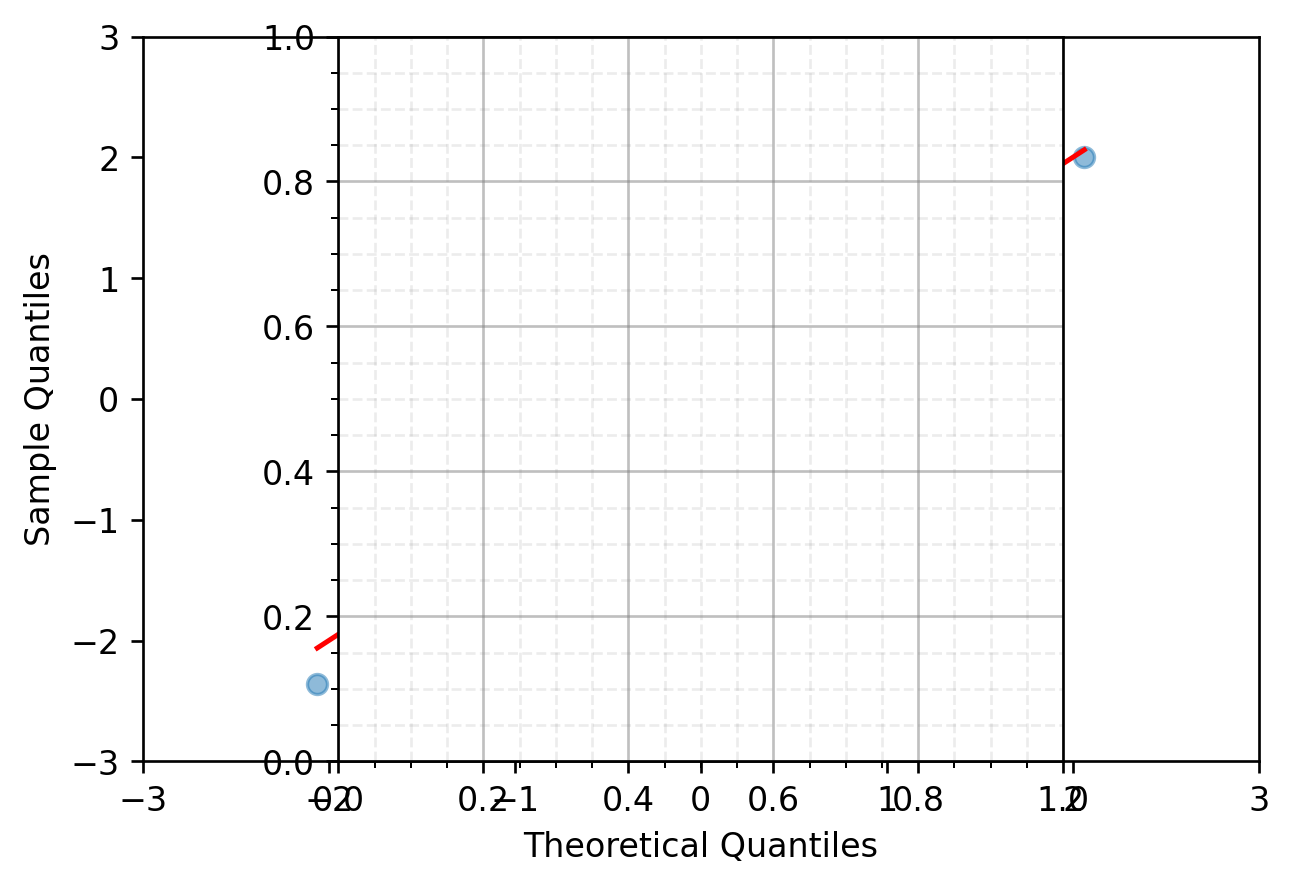

In [17]:
sm.qqplot((x-np.mean(x))/np.std(x), loc = 0, scale = 1, line='s',alpha=0.5) #x - mean / std standardizes data always standardize for qq plot
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.axes().set_aspect('equal')
plt.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.5)
plt.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.15)
plt.minorticks_on()
plt.show()